# Binning

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [5]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head(4)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

In [23]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [25]:
dt = DecisionTreeClassifier()

In [26]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict(X_test)

In [33]:
accuracy_score(y_pred,y_test)

0.6223776223776224

In [35]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6275039123630674

In [96]:
trf = ColumnTransformer([
    ('first',KBinsDiscretizer(n_bins=15,strategy='quantile',encode='ordinal'),[0]),
    ('second',KBinsDiscretizer(n_bins=15,strategy='quantile',encode='ordinal'),[1])
])

In [97]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [98]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [99]:
output = pd.DataFrame({
    'Age':X_train['Age'],
    'Age_trf':X_train_trf[:,0],
    'Fare':X_train['Fare'],
    'Fare_trf':X_train_trf[:,1]
})

In [100]:
output

,Age,Age_trf,Fare,Fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [101]:
output['Age_labels'] = pd.cut(x=X_train['Age'],bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['Fare_label'] = pd.cut(x=X_train['Fare'],bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [102]:
output

,Age,Age_trf,Fare,Fare_trf,Age_labels,Fare_label
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(13.0, 14.454]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(14.454, 18.75]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(7.25, 7.775]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
...,...,...,...,...,...,...
92,46.0,12.0,61.1750,12.0,"(42.0, 47.0]","(51.479, 76.292]"
134,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
337,41.0,11.0,134.5000,14.0,"(38.0, 42.0]","(108.9, 512.329]"
548,33.0,9.0,20.5250,8.0,"(32.0, 35.0]","(18.75, 26.0]"


In [103]:
dt.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [104]:
dt.score(X_test_trf,y_test)

0.6363636363636364

In [160]:
def discretizer(bins,strategy):

    dt = DecisionTreeClassifier()
    trf1 = ColumnTransformer([('first',KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal'),[0]),
                             ('second',KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal'),[1])])
                             
    
    X_trf = trf1.fit_transform(X)   
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')
    
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Fare Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('Fare After')
    plt.show()

0.6625233921008569


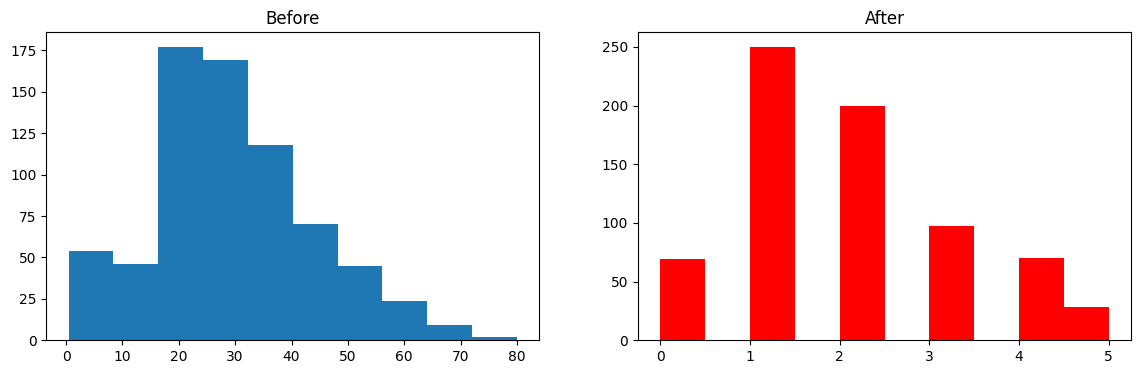

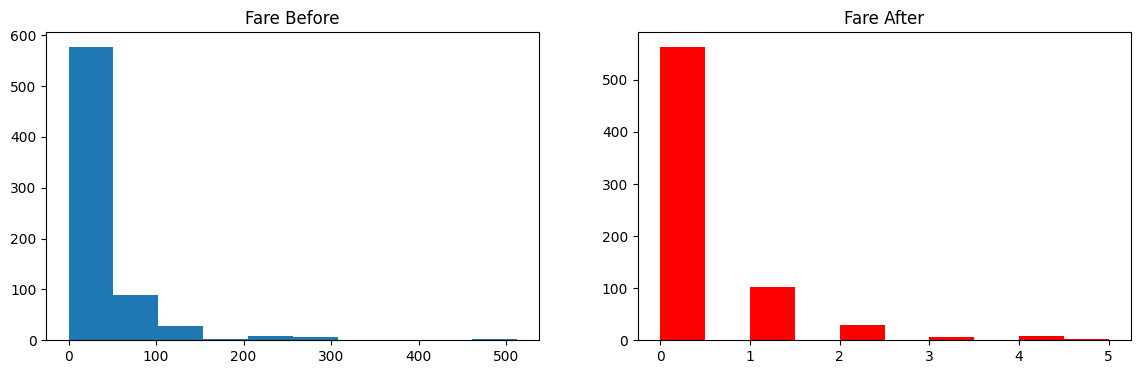

In [162]:
discretizer(6,'kmeans')

# Binarization

In [212]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])
data.head(4)

,Age,SibSp,Parch,Fare,Survived
0,22.0,1,0,7.2500,0
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,1
3,35.0,1,0,53.1000,1


In [213]:
data.dropna(inplace=True)

In [214]:
data['Parent'] = data['SibSp']+data['Parch']

In [215]:
data.drop(columns=['SibSp','Parch'],inplace=True)

In [216]:
data.head(4)

,Age,Fare,Survived,Parent
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1


In [217]:
X = data.drop(columns='Survived')
y = data['Survived']

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [219]:
dt = DecisionTreeClassifier()

In [220]:
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.5874125874125874

In [221]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6485133020344288

In [222]:
from sklearn.preprocessing import Binarizer

In [223]:
trf2 = ColumnTransformer([
    ('family',Binarizer(copy=False),['Parent'])
],remainder='passthrough')

In [224]:
X_train_binarizer = trf2.fit_transform(X_train)
X_test_binarizer = trf2.transform(X_test)

In [227]:
pd.DataFrame(X_train_binarizer,columns=['Parent','Age','Fare'])

,Parent,Age,Fare
0,0.0,32.0,10.5000
1,0.0,13.0,7.2292
2,0.0,23.0,7.8958
3,0.0,38.0,227.5250
4,0.0,20.0,9.2250
...,...,...,...
566,1.0,29.0,10.4625
567,1.0,50.0,26.0000
568,0.0,29.0,10.5000
569,0.0,22.0,7.2250


In [229]:
X_train

,Age,Fare,Parent
70,32.0,10.5000,0
780,13.0,7.2292,0
753,23.0,7.8958,0
716,38.0,227.5250,0
682,20.0,9.2250,0
...,...,...,...
251,29.0,10.4625,2
259,50.0,26.0000,1
66,29.0,10.5000,0
553,22.0,7.2250,0
